In [2]:
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import *
from keras import backend as K
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from keras.datasets import imdb 
from matplotlib import pyplot as plt

In [3]:
class attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [4]:
fn = 'reshape_legalbert_2560'

In [5]:
df = pd.read_csv(r'../Data/BERT2560/Combined/'+ fn +'.csv')

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3832,3833,3834,3835,3836,3837,3838,3839,label,uid
0,0.694659,0.221663,-0.120176,-0.507601,-0.375668,-0.063067,0.446123,0.403159,0.444961,-0.286873,...,-0.030328,-0.088512,-0.196515,-0.206127,-0.403472,0.285773,0.207637,0.008742,1.0,0
1,0.474627,0.033612,-0.224607,-0.129596,0.190784,-0.067255,0.099426,0.185787,0.066976,-0.304500,...,-0.266607,0.030819,-0.283876,-0.228557,-0.451705,0.222950,0.290525,-0.277717,0.0,1
2,0.718219,0.231723,-0.229592,-0.399477,0.004204,0.044448,0.488153,0.180377,0.006841,-0.205156,...,-0.212385,0.024296,-0.006466,0.217261,-0.614147,0.215603,0.263279,0.059186,1.0,2
3,0.541950,0.024961,0.042744,-0.239540,0.074589,0.082739,0.071403,0.509075,0.116463,-0.350714,...,0.019233,0.172554,-0.125242,-0.011911,-0.594645,0.064373,0.439116,-0.035912,1.0,3
4,0.296363,0.339710,-0.282621,-0.219809,-0.252511,0.159772,0.323904,0.222704,-0.185598,-0.071593,...,-0.113264,0.028536,-0.195957,-0.326832,-0.274095,0.323985,0.272582,-0.084046,1.0,4


In [7]:
label = df['label']
df = df.drop(['uid', 'label'], axis = 1)

In [8]:
features = df

In [9]:
del df

In [10]:
features = features.to_numpy()
features = features.reshape(39256, 5, 768)

In [11]:
X, a, y, b = train_test_split(features, label, random_state=42, stratify=label, test_size=0.3)
print(X.shape, y.shape, a.shape, b.shape)

Xv, Xt, yv, yt = train_test_split(a, b, random_state=42, stratify=b, test_size=0.4)
print(Xv.shape, Xt.shape, yv.shape, yt.shape)

(27479, 5, 768) (27479,) (11777, 5, 768) (11777,)
(7066, 5, 768) (4711, 5, 768) (7066,) (4711,)


In [12]:
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(features.shape[1], features.shape[2]), return_sequences=True))) #bidirectional lstm
model.add(attention(return_sequences=True)) # receive 3D and output 2D
model.add(Dropout(0.25))
model.add(Bidirectional(LSTM(50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(20)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [13]:
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [14]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1000, patience=50)
#mc = ModelCheckpoint('best_model_legal_att' + fn + '_.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [15]:
history = model.fit(X, y, validation_data=(Xv, yv), epochs=1000, batch_size=16, callbacks=[es])

Epoch 1/1000
1718/1718 [==============================] - 30s 13ms/step - loss: 0.6583 - accuracy: 0.6015 - val_loss: 0.6418 - val_accuracy: 0.6223
Epoch 2/1000
1718/1718 [==============================] - 21s 12ms/step - loss: 0.6099 - accuracy: 0.6588 - val_loss: 0.6096 - val_accuracy: 0.6625
Epoch 3/1000
1718/1718 [==============================] - 28s 16ms/step - loss: 0.5771 - accuracy: 0.6879 - val_loss: 0.5764 - val_accuracy: 0.6912
Epoch 4/1000
1718/1718 [==============================] - 23s 13ms/step - loss: 0.5558 - accuracy: 0.7049 - val_loss: 0.5647 - val_accuracy: 0.6946
Epoch 5/1000
1718/1718 [==============================] - 21s 12ms/step - loss: 0.5368 - accuracy: 0.7198 - val_loss: 0.5641 - val_accuracy: 0.6939
Epoch 6/1000
1718/1718 [==============================] - 25s 15ms/step - loss: 0.5184 - accuracy: 0.7344 - val_loss: 0.5823 - val_accuracy: 0.7005
Epoch 7/1000
1718/1718 [==============================] - 35s 20ms/step - loss: 0.4990 - accuracy: 0.7482 - val_

1718/1718 [==============================] - 35s 20ms/step - loss: 0.0470 - accuracy: 0.9830 - val_loss: 1.3122 - val_accuracy: 0.7354
Epoch 57/1000
1718/1718 [==============================] - 34s 20ms/step - loss: 0.0422 - accuracy: 0.9849 - val_loss: 1.6597 - val_accuracy: 0.7324
Epoch 57: early stopping


In [16]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [17]:
saved_model = model
# evaluate the model
_, train_acc = saved_model.evaluate(X, y, verbose=0)
_, test_acc = saved_model.evaluate(Xt, yt, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.996, Test: 0.747


In [19]:
lst = [train_acc, test_acc]
df = pd.DataFrame(lst, index =['train_acc', 'test_acc'])
df.to_csv(fn +'best_model_legal_att_results.csv')

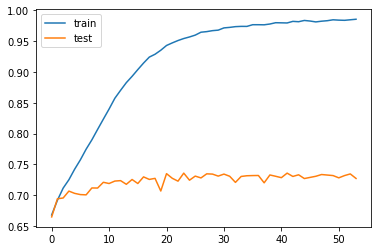

In [20]:
# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.savefig(fn + 'best_model_legal_att_acc.png', bbox_inches='tight')
pyplot.show()


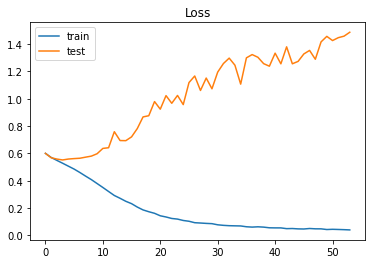

In [21]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
pyplot.savefig(fn + 'best_model_legal_att_loss.png', bbox_inches='tight')
plt.legend()
plt.show();

In [18]:
from sklearn.metrics import classification_report
predictions = saved_model.predict(Xt)
y_pred = np.argmax(predictions,axis=1)
trainReport = classification_report(yt, y_pred, output_dict=True)

lst = [format(trainReport['macro avg']['precision'], '.2f'), format(trainReport['macro avg']['recall'], '.2f'), format(trainReport['macro avg']['f1-score'], '.2f')]
df = pd.DataFrame(lst, index =['precision', 'recall', 'f1Score'])
df.to_csv(filename +'_att_legal_prec_recal_flsc_results.csv')
print(lst)

c:\users\amanj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\amanj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\amanj\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

NameError: name 'filename' is not defined

In [ ]:
yt

In [19]:
print(lst)

['0.28', '0.50', '0.36']


In [20]:
yp = (saved_model.predict(Xt) > 0.5).astype('int32') 

print(yp)

[[0]
 [0]
 [1]
 ...
 [1]
 [0]
 [0]]


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
matrix = confusion_matrix(yt,yp, labels=[1,0])
cm = pd.DataFrame(matrix, index=['1','0'],columns=['1','0'])
print(cm)

      1     0
1  1455   576
0   614  2066


In [23]:
from sklearn.metrics import accuracy_score
print("Test Accuracy Score: %.3f" %(accuracy_score(yt,yp)))

from sklearn.metrics import recall_score
print("Test Recall Score: %.3f" %(recall_score(yt,yp)))

from sklearn.metrics import precision_score
print("Test Precision Score: %.3f" %(precision_score(yt,yp)))

from sklearn.metrics import f1_score
print("Test F1 Score: %.3f" %(f1_score(yt,yp)))


# In[58]:


#lst = [train_acc, valid_acc]
#df = pd.DataFrame(lst, index =['train_acc', 'valid_acc'])
#df.to_csv(filename +'_results.csv')

Test Accuracy Score: 0.747
Test Recall Score: 0.716
Test Precision Score: 0.703
Test F1 Score: 0.710
